In [1]:
#Import all necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import datetime

In [12]:
flights = pd.read_csv("data/flights_cleaned.csv")
weather = pd.read_csv("data/weather_data_complete.csv")

In [16]:
flights = flights[['fl_date','arr_delay','dep_delay','dest_city_name']]

In [18]:
weather = weather.melt(id_vars=["Date"], 
                        var_name="dest_city_name", 
                        value_name="weather")

In [35]:
weather = weather.rename(columns = {'Date':'fl_date'})

In [30]:
weather['weather'] = weather['weather'].str.replace("{'","")
weather['weather'] = weather['weather'].str.replace("'}","")

In [37]:
comb_data = pd.merge(flights, weather, on=['fl_date','dest_city_name'])

In [38]:
comb_data.head()

,fl_date,arr_delay,dep_delay,dest_city_name,weather
0,2019-05-22,-16.0,-2.0,"Boston, MA",Clear
1,2019-05-22,-10.0,-9.0,"Boston, MA",Clear
2,2019-05-22,-21.0,-4.0,"Boston, MA",Clear
3,2019-05-22,-8.0,-7.0,"Boston, MA",Clear
4,2019-05-22,-23.0,-12.0,"Boston, MA",Clear


In [44]:
we_data = comb_data.groupby('weather',as_index = False)[['dep_delay']].sum()
we_data

,weather,dep_delay
0,,15911
1,Clear,91768
2,Overcast,14864
3,Partially cloudy,79242
4,Rain,17615
5,"Rain, Overcast",23667
6,"Rain, Partially cloudy",40672
7,Snow,1295
8,"Snow, Overcast",1830
9,"Snow, Partially cloudy",2787


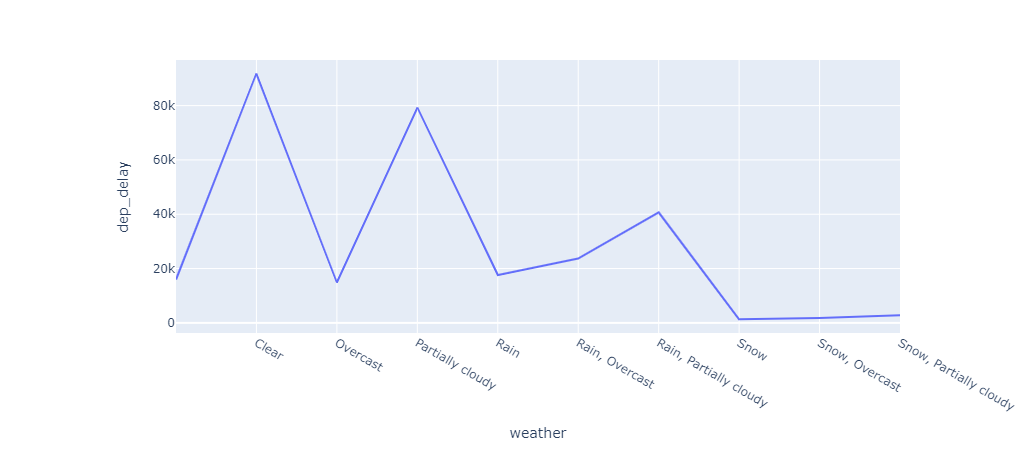

In [45]:
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(we_data, x="weather", y='dep_delay')
fig.show()